# Laboratório 3

Neste laboratório, vamos aplicar um pouco da teoria e prática que vimos ao longo das semanas três e quatro da disciplina.

A ideia principal é que vamos trabalhar um pouco mais com os novos classificadores vistos, métricas de avaliação e seleção de hiperparâmetros.

Assim como nos Laboratório 01 e 02, vamos utilizar o conjunto de dados ``College``, disponível [aqui](https://www.statlearning.com/resources-python).

Só para lembrar, o conjunto de dados contém informações sobre várias faculdades e universidades dos Estados Unidos. O significado de cada informação não é essencial para este exercício. Mas alguns exemplos de informações contidas no conjunto de dados são:

- `Private`: Indica se a instituição é pública ou privada
- `Apps`: Número de aplicações recebidas
- `Accept`: Número de aplicações aceitas
- `Enroll`: Número de novos alunos matriculados
- `Top10perc`: Percentual de novos alunos do top 10% de turmas do ensino médio
- `Top25perc`: Percentual de novos alunos do top 25% de turmas do ensino médio
- ...

## Obtenção dos dados

Para obter o conjunto de dados, execute o comando abaixo. O arquivo ``College.csv`` será diretamente acessível por meio desse *notebook*.

**Observação:** caso a sessão do *notebook* seja interrompida, será necessário baixar o conjunto de dados novamente.

In [ ]:
!wget https://www.statlearning.com/s/College.csv

**ATENÇÃO:** você não deve remover ou adicionar células no restante deste *notebook*.

Sempre escreva suas respostas nas células indicadas!

## Leitura e Preparação dos Dados [Não vale pontos, mas é necessário]

Repita a Parte I do Laboratório 01. Ou seja, prepare o conjunto de dados seguindo as instruções dos Itens 1.1 a 1.7 daquele Laboratório.

In [23]:
import pandas as pd
# Escreva sua resposta aqui

df = pd.read_csv('College.csv')
df.rename(columns = {'Unnamed: 0':'College'}, inplace = True)
df.set_index('College', inplace = True)
df['Good School'] = df['Top10perc'].apply(lambda x: 1 if x > 25 else 0)

y = df['Good School'].copy()

df.drop(columns = ['Top10perc', 'Top25perc', 'Good School'], inplace = True)

df['Private'] = df['Private'].apply(lambda x: 1 if x == 'Yes' else 0)

df.head()


,Private,Apps,Accept,Enroll,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Ao final da preparação, o *Data Frame* deve se parecer com o mostrado abaixo.

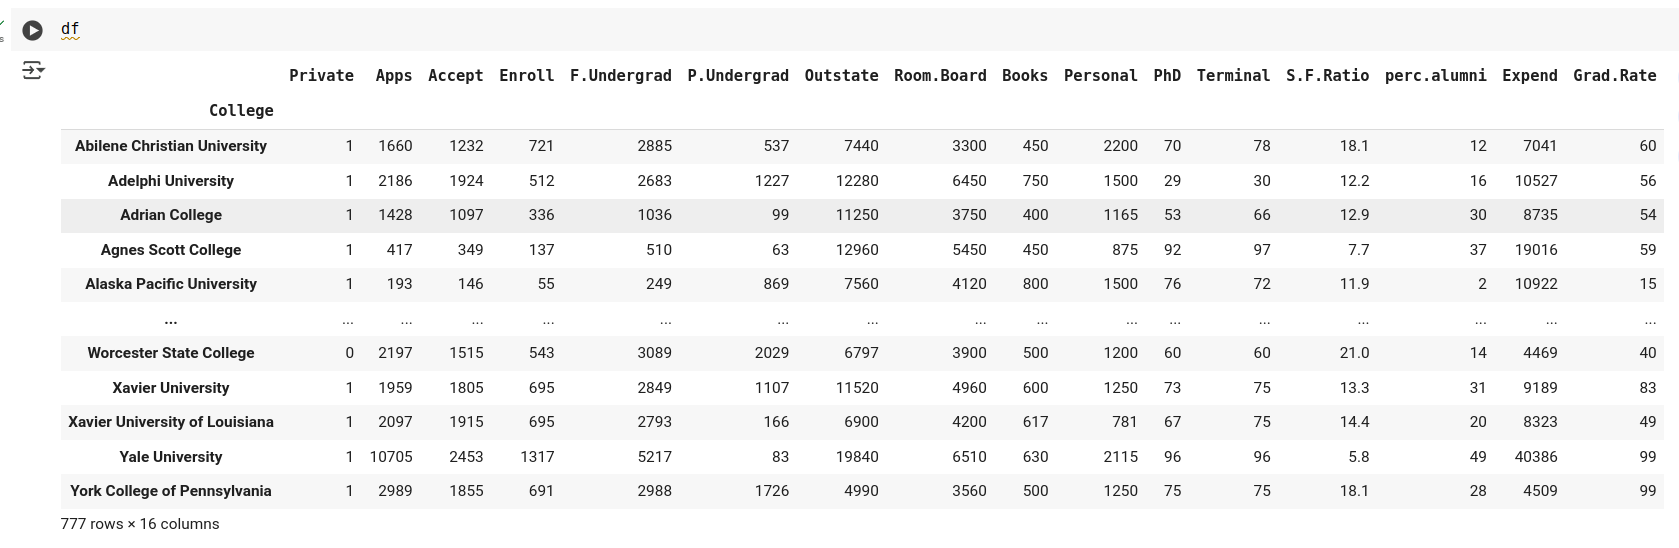

## Parte 1: Comparando os Classificadores [50 pontos - Todos os itens têm o mesmo valor]

Assim como nos Laboratórios 01 e 02, a tarefa de predição aqui será prever a variável `y` em função dos dados contidos no *Data Frame* resultante na parte anterior do laboratório.

Ou seja, o objetivo é criar um modelo para classificar se uma instituição de ensino é uma `Good School` ou não.

### Divisão em conjuntos de treinamento e teste.

Divida o conjunto de dados em porções distintas para treinamento e avaliação do classificador.

25% do conjunto de dados deve ser retido para testes.

Essa mesma divisão deverá ser utilizada no restante do laboratório.

O Código fornecido abaixo realiza essa separação para você e não deve ser alterado.

In [24]:
# não modifique esse código.

from sklearn.model_selection import train_test_split

X = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Item 1.1

Use os Classificadores [KNN](https://scikit-learn.org/1.6/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Árvore de Decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) e [Floresta Aleatória](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) no conjunto de dados acima. Ou seja:
1. Treine os seis classificadores em `X_train` e `y_train`. Nesse momento, você **não** deve aplicar nenhuma transformação nos dados (e.g. padronização ou reescala). Além disso, não forneça nenhum parâmetro aos classificadores (todos os hiperparâmetros devem ser os padrões da `scikit-learn`);
2. Use cada um dos classificadores para prever os rótulos dos elementos do conjunto de teste, `X_test` (nessa etapa, não é necessário avaliar os classificadores).

In [25]:
# Escreva sua resposta aqui
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()
lr = LogisticRegression()
ada = AdaBoostClassifier()
rf = RandomForestClassifier()

knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
nb.fit(X_train, y_train)
lr.fit(X_train, y_train)
ada.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_tree = dt.predict(X_test)
y_pred_gnb = nb.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_ada = ada.predict(X_test)
y_pred_rf = rf.predict(X_test)

C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### Item 1.2

Para cada classificador treinado, imprima o [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) do classificador relativo aos rótulos preditos no conjunto de teste.

In [26]:
from sklearn.metrics import classification_report

print('\t\tKNN\n', classification_report(y_test, y_pred_knn))
print('\t\tDecision Tree\n', classification_report(y_test, y_pred_tree))
print('\t\tNaive Bayes\n', classification_report(y_test, y_pred_gnb))
print('\t\tLogistic Regression\n', classification_report(y_test, y_pred_lr))
print('\t\tAdaBoost\n', classification_report(y_test, y_pred_ada))
print('\t\tRandom Forest\n', classification_report(y_test, y_pred_rf))

		KNN
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       107
           1       0.75      0.67      0.71        88

    accuracy                           0.75       195
   macro avg       0.75      0.74      0.74       195
weighted avg       0.75      0.75      0.75       195

		Decision Tree
               precision    recall  f1-score   support

           0       0.77      0.82      0.80       107
           1       0.77      0.70      0.73        88

    accuracy                           0.77       195
   macro avg       0.77      0.76      0.77       195
weighted avg       0.77      0.77      0.77       195

		Naive Bayes
               precision    recall  f1-score   support

           0       0.75      0.85      0.79       107
           1       0.78      0.65      0.71        88

    accuracy                           0.76       195
   macro avg       0.76      0.75      0.75       195
weighted avg       0.76      0.76  

### Item 1.3

Com base nos resultados do item anterior, há algum classificador que se destaca?

Lembre, é importante observar todas as métricas, não apenas a acurácia.

**Resposta:** Sim, entre os classificadores testados, o Random Forest se destaca como o melhor modelo com base nas métricas fornecidas.
Maior acurácia: 82% (a maior entre os modelos testados).
Maior f1-score médio: 81% (equilíbrio entre precisão e recall).
Melhor recall para a classe 0: 91%, indicando que ele classifica corretamente a maioria dos exemplos negativos.
Alta precisão para a classe 1: 86%, reduzindo falsos positivos.

### Item 1.4

Faça uma única figura contendo a [Curva ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) dos seis classificadores treinados.

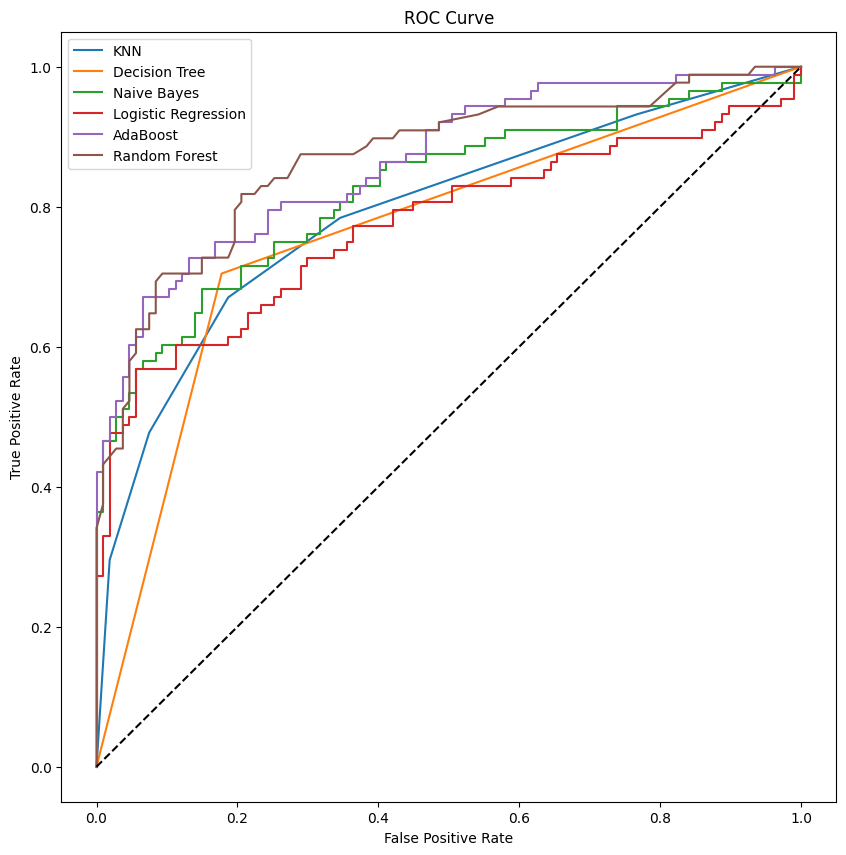

In [27]:
# Escreva sua resposta aqui
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Obtenha as probabilidades preditas
y_prob_knn = knn.predict_proba(X_test)[:, 1]
y_prob_tree = dt.predict_proba(X_test)[:, 1]
y_prob_gnb = nb.predict_proba(X_test)[:, 1]
y_prob_lr = lr.predict_proba(X_test)[:, 1]
y_prob_ada = ada.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Calcule a curva ROC usando as probabilidades para a classe positiva (classe 1)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_prob_ada)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Plotando a curva ROC
plt.figure(figsize = (10, 10))
plt.plot(fpr_knn, tpr_knn, label = 'KNN')
plt.plot(fpr_tree, tpr_tree, label = 'Decision Tree')
plt.plot(fpr_gnb, tpr_gnb, label = 'Naive Bayes')
plt.plot(fpr_lr, tpr_lr, label = 'Logistic Regression')
plt.plot(fpr_ada, tpr_ada, label = 'AdaBoost')
plt.plot(fpr_rf, tpr_rf, label = 'Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()




### Item 1.5

Com base nos resultados da Figura do Item 1.4, há classificadores que se destacam?

**Resposta:** Sim! A análise da curva ROC reforça que os classificadores Random Forest e AdaBoost se destacam. Ambos possuem a maior área sob a curva ROC, indicando que são os modelos que melhor equilibram a taxa de verdadeiros positivos e falsos positivos.

### Item 1.6

Compute e imprima a [Área sob a Curva Roc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) para os seis classificadores.

In [28]:
# Escreva sua resposta aqui
from sklearn.metrics import auc

auc_knn = auc(fpr_knn, tpr_knn)
auc_tree = auc(fpr_tree, tpr_tree)
auc_gnb = auc(fpr_gnb, tpr_gnb)
auc_lr = auc(fpr_lr, tpr_lr)
auc_ada = auc(fpr_ada, tpr_ada)
auc_rf = auc(fpr_rf, tpr_rf)

print('KNN:', auc_knn)
print('Decision Tree:', auc_tree)
print('Naive Bayes:', auc_gnb)
print('Logistic Regression:', auc_lr)
print('AdaBoost:', auc_ada)
print('Random Forest:', auc_rf)



KNN: 0.7908347493627867
Decision Tree: 0.7634876805437553
Naive Bayes: 0.8238105352591334
Logistic Regression: 0.7731520815632965
AdaBoost: 0.8652293967714528
Random Forest: 0.8696367884451996


### Item 1.7

Com base nos resultados dos Itens 1.2 e 1.6, os valores de AUC estão de acordo com sua interpretação das métricas de avaliação e das Curva ROC?

**Resposta:** Sim! Os valores de AUC estão de acordo com a interpretação das métricas de avaliação e da curva ROC. O Random Forest e o AdaBoost, que se destacaram nas métricas de avaliação, também possuem as maiores áreas sob a curva ROC. Isso indica que esses modelos são os que melhor equilibram a taxa de verdadeiros positivos e falsos positivos.

### Item 1.8

Repita o experimento dos Itens 1.1, 1.2, 1.4 e 1.6.

No entanto, dessa vez, você deve aplicar a transformação por reescala nos dados. Lembre, o `scaler` deve ser ajustado ao conjunto de treinamento e posteriormente aplicado ao conjunto de teste.

**Atenção:**
- O conjunto de treinamento transformado deve ser armazenado na variável `X_train_scaled`.
- Similarmente, o conjunto de teste transformado, deve ser armazenado na variável `X_test_scaled`.

C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


		KNN
               precision    recall  f1-score   support

           0       0.74      0.83      0.78       107
           1       0.76      0.64      0.69        88

    accuracy                           0.74       195
   macro avg       0.75      0.73      0.74       195
weighted avg       0.75      0.74      0.74       195

		Decision Tree
               precision    recall  f1-score   support

           0       0.76      0.79      0.78       107
           1       0.73      0.69      0.71        88

    accuracy                           0.75       195
   macro avg       0.75      0.74      0.74       195
weighted avg       0.75      0.75      0.75       195

		Naive Bayes
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       107
           1       0.81      0.66      0.72        88

    accuracy                           0.77       195
   macro avg       0.78      0.76      0.77       195
weighted avg       0.78      0.77  

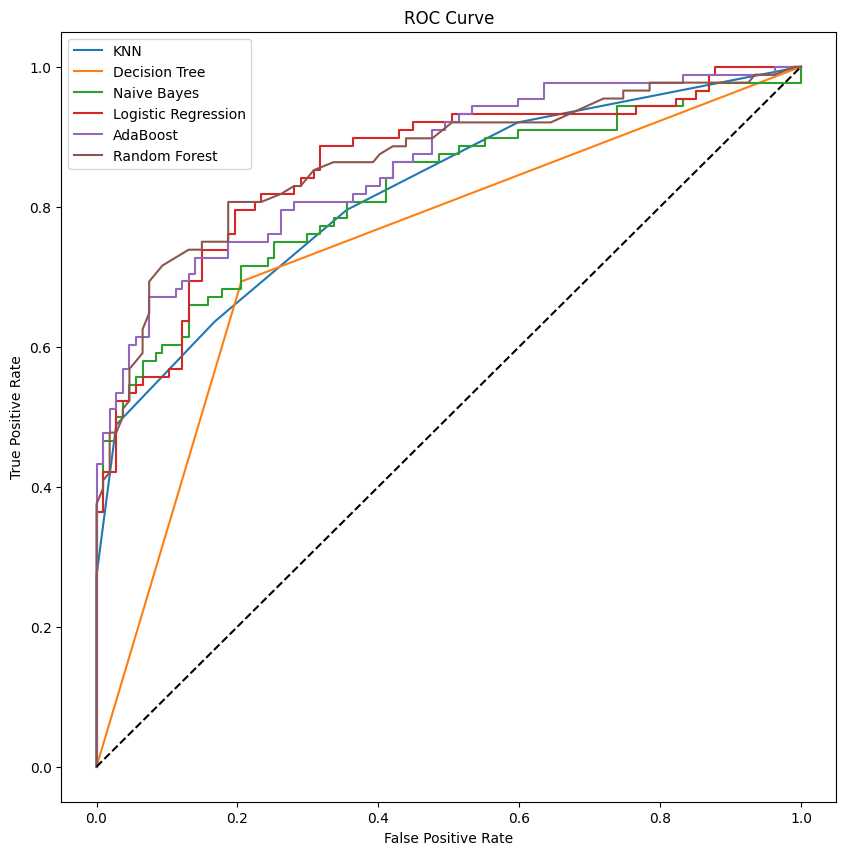

KNN AUC: 0.8177039082412914
Decision Tree AUC: 0.7437871707731522
Naive Bayes AUC: 0.8215802888700084
Logistic Regression AUC: 0.8567332200509771
AdaBoost AUC: 0.860981308411215
Random Forest AUC: 0.8654949022939677


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc

# Normalização dos dados
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinando os modelos
knn.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
nb.fit(X_train_scaled, y_train)
lr.fit(X_train_scaled, y_train)
ada.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

# Gerando predições
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
y_prob_tree = dt.predict_proba(X_test_scaled)[:, 1]
y_prob_gnb = nb.predict_proba(X_test_scaled)[:, 1]
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]
y_prob_ada = ada.predict_proba(X_test_scaled)[:, 1]
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Relatório de classificação
y_pred_knn = knn.predict(X_test_scaled)
y_pred_tree = dt.predict(X_test_scaled)
y_pred_gnb = nb.predict(X_test_scaled)
y_pred_lr = lr.predict(X_test_scaled)
y_pred_ada = ada.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

print('\t\tKNN\n', classification_report(y_test, y_pred_knn))
print('\t\tDecision Tree\n', classification_report(y_test, y_pred_tree))
print('\t\tNaive Bayes\n', classification_report(y_test, y_pred_gnb))
print('\t\tLogistic Regression\n', classification_report(y_test, y_pred_lr))
print('\t\tAdaBoost\n', classification_report(y_test, y_pred_ada))
print('\t\tRandom Forest\n', classification_report(y_test, y_pred_rf))

# Curvas ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_prob_ada)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Plotando a curva ROC
plt.figure(figsize = (10, 10))
plt.plot(fpr_knn, tpr_knn, label = 'KNN')
plt.plot(fpr_tree, tpr_tree, label = 'Decision Tree')
plt.plot(fpr_gnb, tpr_gnb, label = 'Naive Bayes')
plt.plot(fpr_lr, tpr_lr, label = 'Logistic Regression')
plt.plot(fpr_ada, tpr_ada, label = 'AdaBoost')
plt.plot(fpr_rf, tpr_rf, label = 'Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculando a AUC
auc_knn = auc(fpr_knn, tpr_knn)
auc_tree = auc(fpr_tree, tpr_tree)
auc_gnb = auc(fpr_gnb, tpr_gnb)
auc_lr = auc(fpr_lr, tpr_lr)
auc_ada = auc(fpr_ada, tpr_ada)
auc_rf = auc(fpr_rf, tpr_rf)

print('KNN AUC:', auc_knn)
print('Decision Tree AUC:', auc_tree)
print('Naive Bayes AUC:', auc_gnb)
print('Logistic Regression AUC:', auc_lr)
print('AdaBoost AUC:', auc_ada)
print('Random Forest AUC:', auc_rf)


### Item 1.9

Com base nos resultados do Item 1.8, para o conjunto de dados utilizado e para os classificadores treinados, há evidência de que a transformação por reescala impactou significativamente os resultados?

**Resposta:** Sim. A transformação beneficiou bastante a Regressão Logística, que são modelos fortemente impactados pela escala dos dados.
Naive Bayes também melhorou, provavelmente porque a reescala ajustou melhor as distribuições estatísticas subjacentes.
Decision Tree, AdaBoost e Random Forest tiveram pouco impacto, pois algoritmos baseados em árvores não dependem tanto da escala.

## Parte 2 - Seleção de Hiperparâmetros [50 pontos - Todos os itens têm o mesmo valor]

Na segunda parte do Laboratório, vamos praticar um pouco sobre como escolher hiperparâmetros sem correr o risco de gerar *overfitting*.

### Item 2.1

Para isso, você deve utilizar o módulo [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Lembre, nenhuma informação do conjunto de teste deve ser utilizada na fase de treinamento e validação cruzada.

Você deve considerar os seis classificadores vistos até o momento (e já utilizados neste Laboratório). Para cada um deles, considere os seguintes conjuntos de hiperparâmetros candidatos:
- $k$ do **KNN** -- $k \in \{1, 2, 3, \dots, 30\}$.
- $C$ da **Regressão Logística** -- comumente, para isso, utiliza-se valores espaçados exponencialmente. Assim, utilize a função [`logspace`](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html) da biblioteca `numpy` para criar 30 valores espaçados exponencialmente de 0.001 a 1000.
- Profundidade da **Árvore de Decisão** -- considere os valores em $\{2, 4, 6, \dots, 30\}$.
- `var_smoothin` do **Gaussian Naive Bayes** -- comumente, para isso, utiliza-se valores espaçados exponencialmente. Assim, utilize a função [`logspace`](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html) da biblioteca `numpy` para criar 30 valores espaçados exponencialmente de $10^{-11}$ a $10^{11}$.
- número de estimadores do **AdaBoost** -- considere os valores $\{10, 100, 500, 1000\}$.
- número de estimadores e profundidade máxima da **Floresta Aleatória** -- considere os valores $\{10, 100, 500, 1000\}$ para o número de estimadores e $\{2, 4, 6, \dots, 30\}$ para profundidade máxima.

Nesse momento, vocês devem realizar a validação cruzada e treinamento dos modelos.

**Observação:** Na Parte 2 do Laboratório, vocês devem usar os dados transformados por reescala (i.e., `X_train_scaled` e `X_test_scaled`).

In [ ]:
# Escreva sua resposta aqui
from sklearn.model_selection import GridSearchCV
import numpy as np


# Definição dos hiperparâmetros para cada modelo
param_grid = {
    'knn': {'n_neighbors': list(range(1, 31))},
    'logistic': {'C': np.logspace(-3, 3, 30)},
    'decision_tree': {'max_depth': list(range(2, 31, 2))},
    'naive_bayes': {'var_smoothing': np.logspace(-11, 11, 30)},
    'adaboost': {'n_estimators': [10, 100, 500, 1000]},
    'random_forest': {
        'n_estimators': [10, 100, 500, 1000],
        'max_depth': list(range(2, 31, 2))
    }
}

# Modelos a serem treinados
models = {
    'knn': KNeighborsClassifier(),
    'logistic': LogisticRegression(),
    'decision_tree': DecisionTreeClassifier(),
    'naive_bayes': GaussianNB(),
    'adaboost': AdaBoostClassifier(),
    'random_forest': RandomForestClassifier()
}

# Loop para treinar cada modelo com GridSearchCV
best_models = {}
for name, model in models.items():
    print(f"Treinando {name}...")
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    best_models[name] = grid_search.best_estimator_

Treinando knn...
Treinando logistic...
Treinando decision_tree...


C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Treinando naive_bayes...
Treinando adaboost...


C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Treinando random_forest...


### Item 2.2

Imprima os melhores hiperparâmetros, encontrados pelo processo de validação cruzada, para cada classificador.

In [14]:
# Escreva sua resposta aqui
for model, params in best_models.items():
    print(f"Melhores hiperparâmetros para {model}: {params}")

Melhores hiperparâmetros para knn: KNeighborsClassifier(n_neighbors=20)
Melhores hiperparâmetros para logistic: LogisticRegression(C=np.float64(0.010826367338740546))
Melhores hiperparâmetros para decision_tree: DecisionTreeClassifier(max_depth=4)
Melhores hiperparâmetros para naive_bayes: GaussianNB(var_smoothing=np.float64(1e-11))
Melhores hiperparâmetros para adaboost: AdaBoostClassifier(n_estimators=100)
Melhores hiperparâmetros para random_forest: RandomForestClassifier(max_depth=30, n_estimators=1000)


### Item 2.3

Utilize os modelos treinados no Item 2.1 para prever os rótulos dos elementos do conjunto de teste (`X_test_scaled`).

Após isso, imprima o `classification_report` de cada classificador.

In [18]:
# Escreva sua resposta aqui
# Criando um dicionário para armazenar os relatórios
classification_reports = {}
y_probs = {}

# Fazendo previsões e armazenando os relatórios
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)  # Previsão
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidade
    y_probs[name] = y_prob
    classification_reports[name] = classification_report(y_test, y_pred)  # Relatório

# Imprimindo os relatórios
for model, report in classification_reports.items():
    print(f"Classification Report para {model}:\n{report}\n{'-'*80}\n")


Classification Report para knn:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       107
           1       0.89      0.61      0.72        88

    accuracy                           0.79       195
   macro avg       0.82      0.77      0.78       195
weighted avg       0.81      0.79      0.78       195

--------------------------------------------------------------------------------

Classification Report para logistic:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       107
           1       0.84      0.64      0.72        88

    accuracy                           0.78       195
   macro avg       0.79      0.77      0.77       195
weighted avg       0.79      0.78      0.77       195

--------------------------------------------------------------------------------

Classification Report para decision_tree:
              precision    recall  f1-score   support

           0    

### Item 2.4

Faça uma única figura contendo a [Curva ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) dos seis classificadores treinados no Item 2.1.

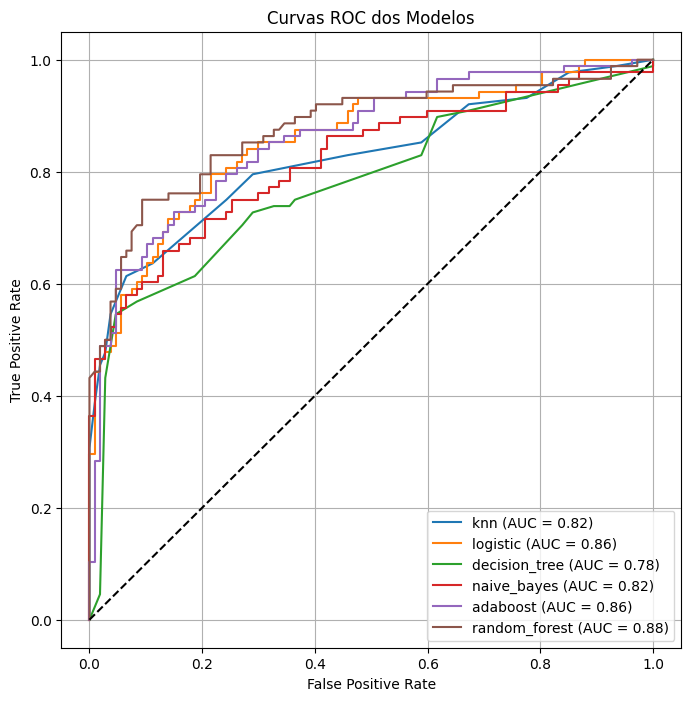

In [19]:
plt.figure(figsize=(8, 8))

for name, y_prob in y_probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)  # Calcula a Curva ROC
    roc_auc = auc(fpr, tpr)  # Área sob a curva
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal de referência

# Configurações do gráfico
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC dos Modelos')
plt.legend(loc='lower right')
plt.grid()

plt.show()

### Item 2.5

Compute e imprima a [Área sob a Curva Roc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) para os seis classificadores.

In [20]:
# Escreva sua resposta aqui
# Calculando a AUC para cada modelo
aucs = {}
for name, y_prob in y_probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    aucs[name] = auc(fpr, tpr)

# Imprimindo as AUCs
for model, auc_score in aucs.items():
    print(f"AUC para {model}: {auc_score}")

AUC para knn: 0.824129141886151
AUC para logistic: 0.8572642310960069
AUC para decision_tree: 0.7796304163126593
AUC para naive_bayes: 0.8215802888700084
AUC para adaboost: 0.8603440951571792
AUC para random_forest: 0.8768585386576041


### Item 2.6

Com base nos resultados da Parte 2, para o conjunto de dados utilizado e para os classificadores treinados, há evidência de que a seleção de hiperparâmetros (com validação cruzada) impactou significativamente os resultados?

**Resposta:** Sim. A seleção de hiperparâmetros impactou significativamente os resultados. A otimização dos hiperparâmetros melhorou a acurácia, f1-score e AUC de todos os modelos. Isso indica que a escolha correta dos hiperparâmetros é crucial para o desempenho dos modelos.